# Assignment 1: Deep Q-Networks (DQN) with [PufferLib Ocean Environments](https://puffer.ai/ocean.html)

*This assignment must be completed solely by the members of your group. Sharing of code between groups is strictly prohibited. However, you are allowed to discuss general solution approaches or share publicly available resources with members of other groups. Therefore, clearly indicate which public resources you consulted and/or copied code from. Any plagiarism between groups will result in the initiation of a fraud procedure with the director of education.*

## Overview

In this notebook, your group will implement a fully vectorized Deep Q-Network (DQN) agent and several of its key improvements, inspired by the ["Rainbow"](https://arxiv.org/abs/1710.02298) paper. The project is divided into a foundational group task followed by individual implementation of specific DQN extensions. Your goal is to compare the performance of these components and then combine them into the ultimate rainbow-lite agent.

### Project Structure:
1.  **Foundational (Group Task):** The entire group will first collaborate to right the necessary code to  make simple DQN work.
2.  **Individual Extensions:** Once the baseline is complete, each group member will be assigned one of the following algorithmic extensions to implement:
    *   **Extension A:** Double DQN & Dueling DQN (Architectural Improvements)
    *   **Extension B:** Prioritized Experience Replay (PER) (Advanced Sampling)
    *   **Extension C:** N-Step Returns & Noisy Networks (Target & Exploration Improvements)
3.  **Analysis (Group Task):** The group will integrate all components, run a comparative analysis on the `breakout` environment, and collaboratively answer the conceptual and reflection questions in a final report.

Cells with `TODO` indicate where you must add or adjust code. However feel free to modify any part of the code to improve clarity, efficiency, or performance. You are encouraged to experiment with hyperparameters and other design choices to optimize your agent's learning.

---

### Environment Tiers:
You will use three types of environments from `pufferlib.ocean`:
1.  **Debug:** `squared` (fast iterations; verify your code  is correct, your agent should learn within seconds and become optimal around 2 minutes, max episode score is 1).
2.  **Comparing:** `cartpole` (fast iterations; verify your extensions and evaluate the agent, learning signs should be clear within 2 minutes but optimal agent could take 30+ minutes, max episode score is 199).
3. **Challenge:** `breakout` (focus on performance, and diagnostics, an optimal agent can take multiple hours, you will get bonus points if you find an optimal agent in this environment, max episode score is 864).

You are allowed to experiment with other environments from `pufferlib.ocean` if you wish, but the above three are mandatory.

---

### Report
We expect you to write the report in a separate document and submit both the notebook and the report on Ufora. Remember that a plot often tells more than a thousand words. When you explain somethings or you show your results, try to add figures to accompany the text. Go beyond just souly describing what you did or how the techniques work but additionally, share your observations, reflect on why things turned out the way they did, and help us understand the story behind your findings.

The report has a soft limit of 8 pages. You are welcome to go over this limit if you keep your writing concise and make sure any extra content is relevant. If you are highly motivated and want to test many different things, feel free to share your findings as long as you follow the requirements mentioned earlier.

If your group is smaller than 3 people, you can choose to implement more than one extension per person. In that case, please clearly indicate who did what in the report.

**Deadline:** October 26, 2025, 23:59


### Office hours
We will hold weekly office hours to help you with questions about the assignment. Your are more then welcome between 13:30 and 16:00. We reserved IDLab9 (IGent) for you. If we are not there, you can find us in our offices on the 10th floor (IGent): 200.026 (Elias and Thibault), 200.031 (Ciem).


---

### Docker
To ensure a consistent and hassle-free setup, we have prepared a Docker image with all necessary dependencies pre-installed. This is the recommended way to run the notebook to avoid issues with package versions.

You can also use there container more information at [puffertank](https://github.com/PufferAI/PufferTank).

The Docker image is available on Docker Hub:
*   **Image:** `ciemcornelissen/puffer-notebook:latest`
*   **URL:** [https://hub.docker.com/r/ciemcornelissen/puffer-notebook](https://hub.docker.com/r/ciemcornelissen/puffer-notebook)

You can use this image in several ways. Below are instructions for three common setups: VS Code (recommended for local use), Deepnote for a cloud-based environment, and locally with classic Jupyter.


### Option 1: Local Development with VS Code

This is the most seamless way to work locally. VS Code's "Dev Containers" extension allows you to open your project folder directly inside the running container, giving you access to a fully integrated terminal, file editor, and Jupyter renderer.

**Prerequisites:**
*   [Docker Desktop](https://www.docker.com/products/docker-desktop/) installed and running.
*   [Visual Studio Code](https://code.visualstudio.com/) installed.
*   The [Dev Containers extension](https://marketplace.visualstudio.com/items?itemName=ms-vscode-remote.remote-containers) installed in VS Code.

**Instructions:**

1.  **Pull and Run the Container:** Open a terminal in your project directory (where this notebook is located) and run the appropriate command below. **Keep this terminal window open.**

    *   **For Linux, Windows (WSL), and Intel-based Macs:**
        ```bash
        docker run -it --rm -p 8888:8888 -v "$(pwd)":/app --name puffer-dev ciemcornelissen/puffer-notebook:latest

    *   **For Apple Silicon (M1/M2/M3) Macs:** You must add the `--platform` flag to emulate the correct architecture.
        ```bash
        docker run -it --rm --platform linux/amd64 -p 8888:8888 -v "$(pwd)":/app --name puffer-dev ciemcornelissen/puffer-notebook:latest

    *   *(Note: We use `--name puffer-dev` to give the container an easy-to-find name).*

2.  **Attach VS Code to the Container:**
    *   Open VS Code.
    *   Attach vsual studio code to the running container:
        1.  Click on the container extension in VS Code.
        2.  Select **"Attach to Running Container..."**.
        3.  Choose the container named `puffer-dev`.
    *   Or open the Command Palette (`Ctrl+Shift+P` on Windows/Linux, `Cmd+Shift+P` on Mac).
    *   Type and select **"Dev Containers: Attach to Running Container..."**.
    *   Choose the right container from the list.


3.  **Start Working:** A new VS Code window will open, connected to the container. Click **"Open Folder"** to open your project files. You can now edit code, run the notebook, and use the terminal as if you were running natively inside the correct environment.

**If you can not select a kernel when trying to run code in the notebook then you need to update the jupyter extension of vsc. This can be done by clicking on the extensions tab on the left and searching for jupyter. Then click on the little gear icon and select install a specific version and choose the newest version.**

### Option 2: Cloud Development with [Deepnote](https://deepnote.com/)

If you prefer not to install Docker locally, you can use Deepnote to run the environment in the cloud.

**Instructions:**

1.  In your Deepnote project, navigate to the **Environment** tab in the left sidebar at the bottem under machine.
2.  Click on the **"Set up a new Docker image"**.
3.  In the "Docker image" field, paste the image name:
    ```
    ciemcornelissen/puffer-notebook:latest

4.  Deepnote will pull the image. Once it's ready, you'll be ready to work.



### Option 3: Local Development with Classic Jupyter

This method uses the command line to start a Jupyter server, which you access through your web browser.

**Instructions:**

1.  **Pull the Image:**
    ```bash
    docker pull ciemcornelissen/puffer-notebook:latest

2.  **Run the Container:** Run the command below from your project directory.

    *   **For Linux, Windows (WSL), and Intel-based Macs:**
        ```bash
        docker run -it --rm -p 8888:8888 -v "$(pwd)":/app ciemcornelissen/puffer-notebook:latest

    *   **For Apple Silicon (M1/M2/M3) Macs:**
        ```bash
        docker run -it --rm --platform linux/amd64 -p 8888:8888 -v "$(pwd)":/app ciemcornelissen/puffer-notebook:latest

3.  **Access Jupyter:** Your terminal will display a URL (e.g., `http://127.0.0.1:8888/lab?token=...`). Copy and paste this full URL into your web browser to start the notebook. Your files will be in the `/app` directory.



### **Important Note for Apple Silicon (M1/M2/M3/M4) Users**

The Docker image is built for the `amd64` (Intel/AMD) architecture. If you are using a Mac with Apple Silicon, you must tell Docker to emulate this architecture by adding the `--platform linux/amd64` flag.

---

## 1.1 Setup

In [4]:
#when using deepnote and you get the error no module pufferlib run this cell

# try:
#     import __editable___pufferlib_3_0_0_finder as _pf
#     _pf.install()          # registers the module loader
#     import pufferlib
#     print("Loaded:", pufferlib.__file__)
# except Exception as e:
#     print("Failed to manually activate editable hook:", e)

In [1]:
import random, dataclasses
from dataclasses import dataclass
from typing import List, Optional, Dict, Any

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Import ocean environments, you can import more if you want to experiment with other envs
from pufferlib.ocean.squared import squared
from pufferlib.ocean.pong import pong
from pufferlib.ocean.pacman import pacman
from pufferlib.ocean.enduro import enduro
from pufferlib.ocean.tetris import tetris
from pufferlib.ocean.breakout import breakout
from pufferlib.ocean.cartpole import cartpole

import gymnasium as gym

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', DEVICE)

Using device: cpu


## Understanding PufferLib and Ocean Environments

### What is [PufferLib](https://puffer.ai/ocean.html)?

**PufferLib** is a high-performance reinforcement learning framework designed to bridge the gap between research and production RL. It was created to address common pain points in RL development:

- **Speed:** PufferLib environments are highly optimized, often running 10-100x faster than traditional implementations
- **Scalability:** Built-in support for massive parallelization across thousands of environments
- **Simplicity:** Clean, minimal API that follows Gymnasium standards
- **GPU-Native:** Environments can run directly on GPU, eliminating CPU-GPU transfer bottlenecks


### PufferLib Ocean: Educational RL Environments

**Ocean** is PufferLib's collection of lightweight, educational environments. The name reflects its purpose: a "sea" of diverse environments for learning and experimentation. Ocean environments are specifically designed for:

1. **Fast Debugging:** Quickly verify your algorithm works before scaling up
2. **Rapid Prototyping:** Test new ideas without waiting hours for results
3. **Educational Clarity:** Simpler codebases that are easier to understand and modify
4. **Vectorization by Default:** Learn modern RL practices from the start

### Available Ocean Environments

Ocean includes a variety of environments with different characteristics (more can be found in the [docs](https://github.com/PufferAI/PufferLib/tree/3.0/pufferlib/ocean)):

- **Classic Control:** `cartpole`
  - Simple physics simulations
  - Low-dimensional observations
  - Great for debugging and initial testing

- **Grid Worlds:** `squared`, `minigrid_variants`
  - Discrete state/action spaces
  - Fast iteration times
  - Perfect for verifying algorithm correctness

- **Atari-Style:** `breakout`, `pong`, `pacman`, `enduro`
  - More complex visual observations
  - Longer training times
  - Closer to real-world RL challenges

- **Puzzle Games:** `tetris`
  - Strategic planning required
  - Sparse rewards
  - Advanced challenge tasks

### Why PufferLib for This Assignment?

We chose PufferLib Ocean for several pedagogical reasons:

1. **Immediate Feedback:** Fast environments mean you can iterate quickly on your code
2. **Realistic Scale:** The environment enables easy vectorized environments like in real RL research
3. **Low Hardware Requirements:** Efficient implementation means you don't need expensive GPUs because of vectorised observations
4. **Clear Progression:** From simple (Squared) to complex (Breakout) in the same framework
5. **Industry Relevance:** PufferLib is used in actual RL research and applications


## 1.2 Environment Factories

In [2]:
class TimeLimitVec:
    """
    Generic vector env time-limit wrapper for PufferLib/Gymnasium-like envs.docker run -it --rm -p 8888:8888 -v "$(pwd)":/app ciemcornelissen/puffer-notebook:latest
    - Marks truncations True when per-env step count reaches max_episode_steps.
    - Preserves existing terminals/truncations from the underlying env.
    - Resets per-env counters on reset or when an env ends.
    """
    def __init__(self, env: Any, max_episode_steps: int, info_key: str = "time_limit"):
        assert max_episode_steps and max_episode_steps > 0
        self.env = env
        self.max_episode_steps = int(max_episode_steps)
        self.info_key = info_key

        # Mirror common attributes for compatibility
        self.single_observation_space = getattr(env, "single_observation_space", None)
        self.single_action_space = getattr(env, "single_action_space", None)
        self.observation_space = getattr(env, "observation_space", None)
        self.action_space = getattr(env, "action_space", None)
        self.num_agents = getattr(env, "num_agents", 1)

        self._steps = np.zeros(self.num_agents, dtype=np.int64)

    def reset(self, seed: Optional[int] = 0):
        obs, infos = self.env.reset(seed)
        self._steps[...] = 0
        return obs, infos

    # def reset(self, seed: Optional[int] = None): 
    #     if seed is None:
    #         seed = random.randint(1, 2**32 - 1)
    #     obs, infos = self.env.reset(seed)
    #     self._steps[...] = 0
    #     return obs, infos


    def step(self, actions):
        obs, rewards, terminals, truncations, infos = self.env.step(actions)

        t = np.asarray(terminals, dtype=bool)
        tr = np.asarray(truncations, dtype=bool)
        if t.ndim == 0:
            t = t.reshape(1)
        if tr.ndim == 0:
            tr = tr.reshape(1)

        active = ~(t | tr)
        # Increment only for envs still active before this step's end flags
        self._steps[active] += 1

        # Apply time limit where not already ended this step
        timeouts = (self._steps >= self.max_episode_steps) & active
        if np.any(timeouts):
            tr = np.logical_or(tr, timeouts)
            self._steps[timeouts] = 0
            if infos is None:
                infos = []
            if not isinstance(infos, list):
                infos = [infos]
            infos.append({self.info_key: {"timeouts": timeouts.copy()}})

        # Also reset counters for any envs that ended naturally
        ended = t | tr
        if np.any(ended):
            self._steps[ended] = 0

        return obs, rewards, t, tr, infos

    def render(self, *args, **kwargs):
        return getattr(self.env, "render")(*args, **kwargs)

    def close(self):
        return getattr(self.env, "close")()
def make_env(name: str, seed: int = 0):
    env_map = {
        'squared': squared,
        'pong': pong,
        'pacman': pacman,
        'enduro': enduro,
        'tetris': tetris,
        'breakout': breakout,
        'cartpole': cartpole
    }
    if name not in env_map:
        raise ValueError(f'Unknown environment {name}')

    def thunk():
        # Get the module from the map
        env_module = env_map[name]

        # For example, in the 'squared' module, there is a 'Squared' class.
        env_class_name = name.capitalize()
        env_class = getattr(env_module, env_class_name)

        raw_env = env_class(num_envs=1, render_mode=None, seed=seed)  # Instantiate the class
        env = TimeLimitVec(raw_env, max_episode_steps=10_000)
        env.reset(seed=seed)
        return env
    return thunk

debug_env_name = 'squared'
intermediate_env_name = 'cartpole'  # Change to 'pacman', 'enduro', or 'tetris' if desired
challenge_env_name = 'breakout'

test_env = make_env(debug_env_name)()
obs, info = test_env.reset()
print('Debug env observation shape:', np.array(obs).shape)
print('Action space:', test_env.action_space)
print('Observation space:', test_env.observation_space)

Debug env observation shape: (1, 121)
Action space: MultiDiscrete([5])
Observation space: Box(0, 1, (1, 121), uint8)


## 1.3 Configuration
Adjust hyperparameters and add hyperparameters as needed.

In [3]:
@dataclass
class Config:
    seed: int = 7
    gamma: float = 0.95                # prioritize short-term rewards
    lr: float = 1e-3                   # can reduce to 1e-4 if unstable
    batch_size: int = 128
    buffer_capacity: int = 1000      # larger buffer for diverse data
    min_buffer_size: int = 200       # start training with more data
    max_steps_per_env: int = 60_000
    max_episode_len: int = 500
    epsilon_start: float = 1.0
    epsilon_end: float = 0.01
    epsilon_decay_steps: int = 5000
    target_update_interval: int = 100
    train_freq: int = 4
    gradient_clip: float = 10.0
    reward_clip: Optional[float] = None
    use_double_dqn: bool = False
    use_dueling: bool = False           # enabled for better value estimation
    vector_envs: int = 1
    log_interval_episodes: int = 10
    eval_episodes: int = 3
    curriculum: List[str] = None
    hidden_size: int = 256             # larger network for complex patterns

cfg = Config()
cfg.curriculum = [debug_env_name, intermediate_env_name]

random.seed(cfg.seed)
np.random.seed(cfg.seed)
torch.manual_seed(cfg.seed)
cfg

Config(seed=7, gamma=0.95, lr=0.001, batch_size=64, buffer_capacity=20000, min_buffer_size=2000, max_steps_per_env=50000, max_episode_len=10000, epsilon_start=1.0, epsilon_end=0.1, epsilon_decay_steps=50000, target_update_interval=500, train_freq=1, gradient_clip=10.0, reward_clip=None, use_double_dqn=False, use_dueling=False, vector_envs=1, log_interval_episodes=10, eval_episodes=3, curriculum=['squared', 'cartpole'], hidden_size=256)

## 1.4 Replay Buffer


In [4]:
class ReplayBuffer:
    def __init__(self, capacity: int, obs_shape: tuple, device):
        self.capacity = capacity
        self.device = device
        self.obs_shape = obs_shape
        self.position = 0
        self.size = 0
        
        # Pre-allocate numpy arrays for storage
        self.obs = np.zeros((capacity, *obs_shape), dtype=np.float32)
        self.actions = np.zeros((capacity, 1), dtype=np.int64)  # Shape: (capacity, 1)
        self.rewards = np.zeros((capacity, 1), dtype=np.float32)
        self.next_obs = np.zeros((capacity, *obs_shape), dtype=np.float32)
        self.dones = np.zeros((capacity, 1), dtype=np.float32)
    
    def push(self, obs, action, reward, next_obs, done):
        """Store a transition"""
        self.obs[self.position] = obs
        self.actions[self.position, 0] = action  # Store as scalar in (1,) shaped array
        self.rewards[self.position, 0] = reward
        self.next_obs[self.position] = next_obs
        self.dones[self.position, 0] = float(done)
        
        self.position = (self.position + 1) % self.capacity
        self.size = min(self.size + 1, self.capacity)
    
    def sample(self, batch_size: int):
        """Sample a batch of transitions and convert to PyTorch tensors"""
        indices = np.random.choice(self.size, batch_size, replace=False)
        
        # Convert to tensors - actions will have shape (batch_size, 1)
        obs = torch.FloatTensor(self.obs[indices]).to(self.device)
        actions = torch.LongTensor(self.actions[indices]).to(self.device)  # (batch_size, 1)
        rewards = torch.FloatTensor(self.rewards[indices]).to(self.device)
        next_obs = torch.FloatTensor(self.next_obs[indices]).to(self.device)
        dones = torch.FloatTensor(self.dones[indices]).to(self.device)
        
        return obs, actions, rewards, next_obs, dones
    
    def __len__(self):
        return self.size

# Test ReplayBuffer
print("Testing ReplayBuffer...")
test_buffer = ReplayBuffer(100, (4,), DEVICE)
test_buffer.push(np.array([1,2,3,4]), 0, 1.0, np.array([2,3,4,5]), False)
assert len(test_buffer) == 1, "Buffer should have 1 element"
obs, actions, rewards, next_obs, dones = test_buffer.sample(1)
assert obs.shape == (1, 4), f"Expected shape (1, 4), got {obs.shape}"
print("✓ ReplayBuffer tests passed!")

Testing ReplayBuffer...
✓ ReplayBuffer tests passed!


## 1.5 Epsilon Schedule
Linear decay from start to end over `epsilon_decay_steps`.

In [5]:
def epsilon_by_step(step: int, cfg: Config) -> float:
    per_step = (cfg.epsilon_start-cfg.epsilon_end)/cfg.epsilon_decay_steps
    if step < cfg.epsilon_decay_steps:
        eps = cfg.epsilon_start - (step*per_step)
    else:
        eps = cfg.epsilon_end
    return eps

print('Epsilon(0)=', epsilon_by_step(0, cfg), 'Epsilon(mid)=', epsilon_by_step(cfg.epsilon_decay_steps//2, cfg), 'Epsilon(end)=', epsilon_by_step(cfg.epsilon_decay_steps*2, cfg))

Epsilon(0)= 1.0 Epsilon(mid)= 0.55 Epsilon(end)= 0.1


## 1.6 Q-Network Architectures

In [6]:
class MLPQ(nn.Module):
    def __init__(self, obs_dim: int, action_dim: int, dueling=False):
        super().__init__()
        self.hidden_size = cfg.hidden_size  # Typically 128, 256, or 512
        self.dueling = dueling
        self.action_dim = action_dim

        self.network = nn.Sequential(
            nn.Linear(obs_dim, self.hidden_size),
            nn.ReLU(),
            nn.Linear(self.hidden_size, self.hidden_size),
            nn.ReLU(),
            nn.Linear(self.hidden_size, action_dim)
        )
    
    def forward(self, x):
        if not self.dueling:
            # Standard DQN: directly output Q-values
            return self.network(x)
        else:
            # Dueling DQN: Q(s,a) = V(s) + (A(s,a) - mean(A(s,a)))
            features = self.feature(x)
            
            value = self.value_stream(features)
            advantages = self.advantage_stream(features)
            
            q_values = value + (advantages - advantages.mean(dim=1, keepdim=True))
            
            return q_values

def build_q_network(env, cfg: Config):
    obs_space = env.single_observation_space
    print('Obs space:', obs_space.shape[0])
    act_space = env.single_action_space
    action_dim = act_space.n
    assert isinstance(act_space, gym.spaces.Discrete), 'DQN requires discrete actions'
    if len(obs_space.shape) == 1:
        return MLPQ(obs_space.shape[0], action_dim, dueling=cfg.use_dueling)


# Quick test on debug env
net_test_env = test_env
test_net = build_q_network(net_test_env, cfg).to(DEVICE)
print(test_net)

Obs space: 121
MLPQ(
  (network): Sequential(
    (0): Linear(in_features=121, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=5, bias=True)
  )
)


## 1.7 Action Selection
Standard epsilon-greedy policy. (Later you might incorporate noisy networks or exploration bonuses.)

In [7]:
@torch.no_grad()
def select_action(q_net, obs, epsilon: float, env):
    if random.random() < epsilon:
        return env.action_space.sample()
    if isinstance(obs, torch.Tensor):
        obs_t = obs.to(DEVICE, dtype=torch.float32, non_blocking=True)
    else:
        obs_t = torch.as_tensor(obs, dtype=torch.float32, device=DEVICE)
    q_vals = q_net(obs_t)
    return int(q_vals.argmax(dim=1).item())

# Test call
dummy_action = select_action(test_net, obs, 1.0, test_env)
print('Random/greedy test action:', dummy_action)

Random/greedy test action: [0]


## 1.8 Training Step
Compute standard DQN loss or Double DQN target if `cfg.use_double_dqn=True`.

Target for vanilla DQN:
$$ y = r + (1-d) \gamma \max_{a'} Q_{target}(s', a') $$

Double DQN variant:
$$ a^* = \arg\max_{a'} Q_{online}(s', a') \quad; \quad y = r + (1-d) \gamma Q_{target}(s', a^*) $$

In [8]:
loss_fn = nn.SmoothL1Loss()

def train_step(q_net, target_net, optimizer, replay: ReplayBuffer, cfg: Config):
    """
    Performs one training step of DQN.
    
    Args:
        q_net: Online Q-network (being trained)
        target_net: Target Q-network (frozen, updated periodically)
        optimizer: Optimizer for q_net
        replay: Replay buffer containing transitions
        cfg: Configuration object
    
    Returns:
        Loss value or None if buffer not ready
    """
    # Don't train until we have enough experiences
    if len(replay) < cfg.min_buffer_size:
        return None
    
    obs, actions, rewards, next_obs, dones = replay.sample(cfg.batch_size)

    q_values = q_net(obs)  # Shape: (batch_size, action_dim)

    q_sa = q_values.gather(1, actions)  # Shape: (batch_size, 1)
    
    # ============= Compute Target Q-values =============
    with torch.no_grad():  # Don't compute gradients for target
        if cfg.use_double_dqn:
            
            # Step 1: Use online network to find best action in next state
            next_q_values_online = q_net(next_obs)  # Shape: (batch_size, action_dim)
            best_actions = next_q_values_online.argmax(dim=1, keepdim=True)  # Shape: (batch_size, 1)
            
            # Step 2: Use target network to evaluate that action
            next_q_values_target = target_net(next_obs)  # Shape: (batch_size, action_dim)
            next_q_value = next_q_values_target.gather(1, best_actions)  # Shape: (batch_size, 1)
            
        else:
            # Vanilla DQN: Use target network for both selection and evaluation
            next_q_values = target_net(next_obs)  # Shape: (batch_size, action_dim)
            next_q_value = next_q_values.max(dim=1, keepdim=True)[0]  # Shape: (batch_size, 1)
            # Note: max returns (values, indices), we take [0] for values
        
        # Compute TD target: y = r + γ * max Q(s', a') * (1 - done)
        # The (1 - dones) term zeros out the next_q_value if episode ended
        target = rewards + cfg.gamma * next_q_value * (1 - dones)  # Shape: (batch_size, 1)

    loss = loss_fn(q_sa, target)
    
    # Standard PyTorch training loop
    optimizer.zero_grad()  # Clear previous gradients
    loss.backward()  # Compute gradients
    nn.utils.clip_grad_norm_(q_net.parameters(), cfg.gradient_clip)  # Prevent exploding gradients
    optimizer.step()  # Update weights
    
    return float(loss.item())

## 1.9 Reward Processing
Add optional reward clipping to stabilize training on environments with high or varied reward magnitudes.

If `cfg.reward_clip` is set, clip reward to `[-cfg.reward_clip, cfg.reward_clip]`.

In [9]:
def process_reward(r: float, cfg: Config):
    if cfg.reward_clip is not None:
        return max(-cfg.reward_clip, min(cfg.reward_clip, r))
    return r

# Quick test
cfg.reward_clip = None  # Set to 1.0 to try clipping later
print('Reward test (no clip):', process_reward(5.0, cfg))
cfg.reward_clip = 1.0
print('Reward test (clip=1.0):', process_reward(5.0, cfg))
cfg.reward_clip = None  # Reset for training; modify if desired

Reward test (no clip): 5.0
Reward test (clip=1.0): 1.0


## 1.10 Evaluation Utilities
Evaluation runs with greedy policy (`epsilon=0`).


In [10]:
def evaluate(env_fn, q_net, cfg: Config, episodes: int):
    env = env_fn
    returns = []
    for _ in range(episodes):
        obs, _ = env.reset()
        done = False
        ep_ret = 0
        steps = 0
        while not done and steps < cfg.max_episode_len:
            a = select_action(q_net, obs, 0.0, env)
            obs2, r, terminated, truncated, _ = env.step(a)
            done = terminated or truncated
            ep_ret += r
            obs = obs2
            steps += 1
        returns.append(ep_ret)
    return float(np.mean(returns))

def hard_update(target, source):
    target.load_state_dict(source.state_dict())

print('Eval utility ready.')

Eval utility ready.


## 1.11 Training Loop
We iterate over the environments in.
Logging per stage:
- `episode_rewards`
- `losses`
- `eps_history`
- `eval` (periodic greedy evaluation)

Increase `max_steps_per_env` for stronger performance. For quick debugging, you may temporarily reduce it.


In [70]:
all_stage_logs: Dict[str, Dict[str, List]] = {}

q_net = None
target_net = None
optimizer = None
stage_index = 0

# Easy way to check agent performance over different envs
for stage_env_name in cfg.curriculum:
    print(f"\n=== Stage {stage_index+1}: {stage_env_name} ===")
    env = make_env(stage_env_name, seed=cfg.seed + stage_index)()
    eval_env = make_env(stage_env_name, seed=cfg.seed + 100 + stage_index)()

    q_net = build_q_network(env, cfg).to(DEVICE)
    target_net = build_q_network(env, cfg).to(DEVICE)
    hard_update(target_net, q_net)
    optimizer = optim.Adam(q_net.parameters(), lr=cfg.lr)

    replay = ReplayBuffer(cfg.buffer_capacity, env.single_observation_space.shape, DEVICE)

    logs = {
        'episode_rewards': [],
        'losses': [],
        'eps_history': [],
        'eval': [],
    }

    obs, _ = env.reset()
    ep_reward = 0
    ep_steps = 0
    episode_counter = 0
    recent_ep_returns = []
    total_steps = 0
    print('Starting training...')
    while total_steps < cfg.max_steps_per_env:
        epsilon = epsilon_by_step(total_steps, cfg)
        action = select_action(q_net, obs, epsilon, env) 
        next_obs, reward, terminated, truncated, info = env.step(action)
        reward = process_reward(reward, cfg)
        reward = float(np.asarray(reward).reshape(-1)[0])
        done = bool(np.asarray(terminated).reshape(-1)[0] or np.asarray(truncated).reshape(-1)[0])
        replay.push(obs.copy(), int(action), reward, next_obs.copy(), done)
        obs = next_obs.copy()
        ep_reward += reward
        ep_steps += 1
        total_steps += 1

        # Training
        if total_steps % cfg.train_freq == 0:
            loss = train_step(q_net, target_net, optimizer, replay, cfg)
            if loss is not None:
                logs['losses'].append(loss)

        # Target update
        if total_steps % cfg.target_update_interval == 0:
            hard_update(target_net, q_net)

        logs['eps_history'].append(epsilon)

        if done or ep_steps >= cfg.max_episode_len:
            logs['episode_rewards'].append(ep_reward)
            recent_ep_returns.append(ep_reward)
            episode_counter += 1

            # --- DEBUG PRINT ---
            if len(logs['losses']) > 0:
                mean_loss = np.mean(logs['losses'][-100:])
            else:
                mean_loss = 0.0
            mean_reward = np.mean(recent_ep_returns[-cfg.log_interval_episodes:]) if recent_ep_returns else 0.0
            with torch.no_grad():
                q_sample = q_net(torch.FloatTensor(obs).unsqueeze(0).to(DEVICE))
                mean_q = q_sample.mean().item()
            grads = []
            for p in q_net.parameters():
                if p.grad is not None:
                    grads.append(p.grad.norm().item())
            grad_norm = np.mean(grads) if grads else 0.0
            print(f"[DEBUG] Step {total_steps:6d} | Ep {episode_counter:4d} | "
                  f"Eps {epsilon:.3f} | MeanReward(10ep): {mean_reward:7.3f} | "
                  f"MeanLoss(100it): {mean_loss:8.5f} | "
                  f"MeanQ: {mean_q:7.3f} | GradNorm: {grad_norm:7.4f}")

            if episode_counter % cfg.log_interval_episodes == 0:
                mean_recent = np.mean(recent_ep_returns[-cfg.log_interval_episodes:])
                print(f"[{stage_env_name}] Ep {episode_counter} Steps {total_steps} "
                      f"RecentMean {mean_recent:.2f} Eps {epsilon:.3f}")

            obs, _ = env.reset()
            ep_reward = 0
            ep_steps = 0

            # Periodic evaluation (every 2*log_interval episodes if we have progress)
            if episode_counter % (cfg.log_interval_episodes * 2) == 0:
                eval_ret = evaluate(eval_env, q_net, cfg, cfg.eval_episodes)
                logs['eval'].append((total_steps, eval_ret))
                print(f"Eval @ Ep {episode_counter} and {total_steps} steps => mean return {eval_ret:.2f}")

    save_checkpoint(checkpoint_path, q_net, optimizer, cfg, stage_env_name)
    
    all_stage_logs[stage_env_name] = logs
    stage_index += 1



=== Stage 1: squared ===
Obs space: 121
Obs space: 121
Starting training...
[DEBUG] Step      5 | Ep    1 | Eps 1.000 | MeanReward(10ep):   1.000 | MeanLoss(100it):  0.00000 | MeanQ:   0.019 | GradNorm:  0.0000
[DEBUG] Step     39 | Ep    2 | Eps 0.999 | MeanReward(10ep):   0.000 | MeanLoss(100it):  0.00000 | MeanQ:   0.019 | GradNorm:  0.0000
[DEBUG] Step     41 | Ep    3 | Eps 0.999 | MeanReward(10ep):   0.333 | MeanLoss(100it):  0.00000 | MeanQ:   0.019 | GradNorm:  0.0000
[DEBUG] Step     46 | Ep    4 | Eps 0.999 | MeanReward(10ep):   0.500 | MeanLoss(100it):  0.00000 | MeanQ:   0.019 | GradNorm:  0.0000
[DEBUG] Step     69 | Ep    5 | Eps 0.999 | MeanReward(10ep):   0.600 | MeanLoss(100it):  0.00000 | MeanQ:   0.019 | GradNorm:  0.0000
[DEBUG] Step     70 | Ep    6 | Eps 0.999 | MeanReward(10ep):   0.667 | MeanLoss(100it):  0.00000 | MeanQ:   0.019 | GradNorm:  0.0000
[DEBUG] Step     71 | Ep    7 | Eps 0.999 | MeanReward(10ep):   0.714 | MeanLoss(100it):  0.00000 | MeanQ:   0.01

##  Visualization Per Stage
helper code for plots, feel free to modify or use different tools, e.g. WandB.
Plots: Episode rewards, Epsilon schedule, Loss curve, and Evaluation returns.


=== squared ===


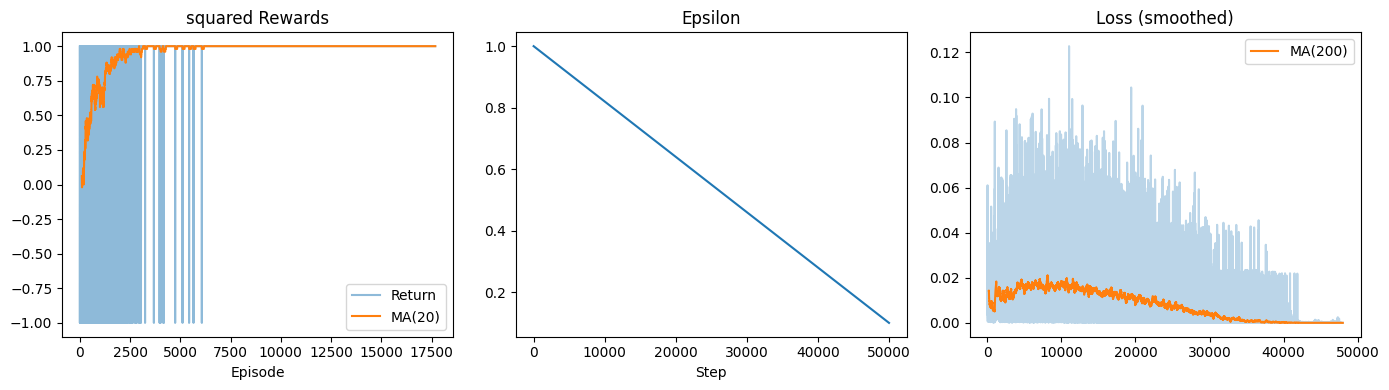

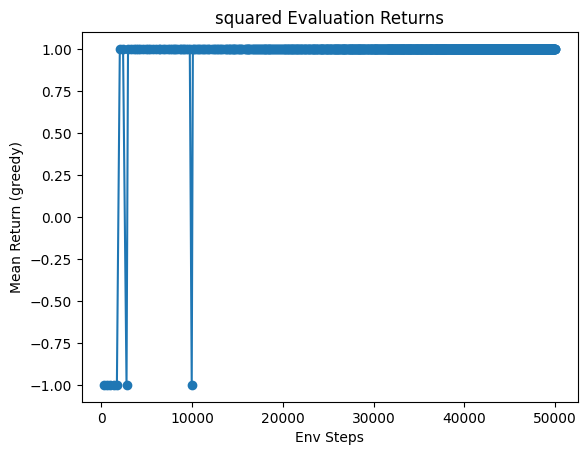


=== cartpole ===


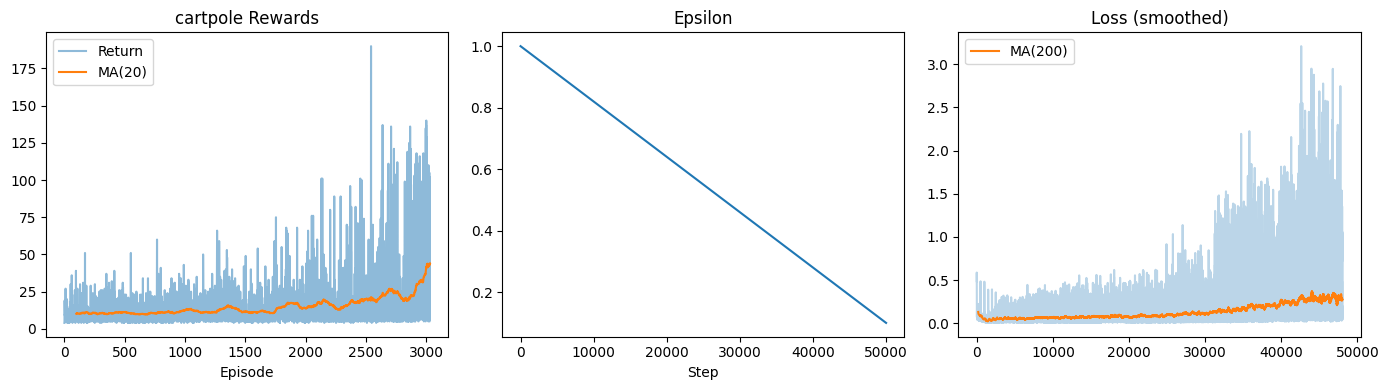

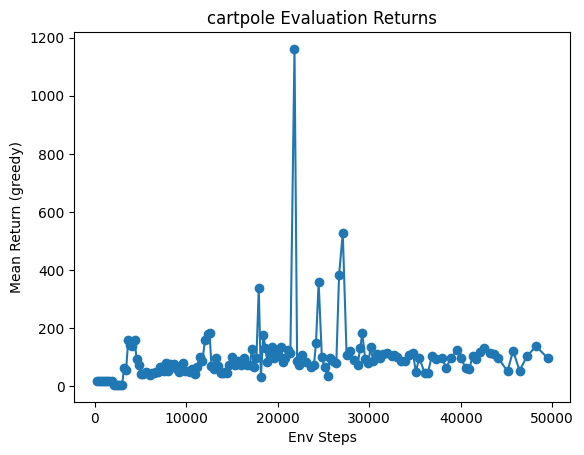

In [71]:
def moving_average(x, w):
    # Ensure x is a flattened 1D numpy array to handle lists like [[1],[2],[3]]
    x = np.array(x).flatten()
    if len(x) < w:
        return x
    return np.convolve(x, np.ones(w)/w, mode='valid')

for stage, logs in all_stage_logs.items():
    rewards = logs['episode_rewards']
    losses = logs['losses']
    eps_hist = logs['eps_history']
    evals = logs['eval']
    print(f"\n=== {stage} ===")
    plt.figure(figsize=(14,4))
    # Rewards
    plt.subplot(1,3,1)
    plt.title(f'{stage} Rewards')
    plt.plot(rewards, alpha=0.5, label='Return')
    ma = moving_average(rewards, 100)
    if len(ma) != len(rewards):
        plt.plot(range(len(rewards)-len(ma), len(rewards)), ma, label='MA(20)')
    plt.legend()
    plt.xlabel('Episode')

    # Epsilon
    plt.subplot(1,3,2)
    plt.title('Epsilon')
    plt.plot(eps_hist)
    plt.xlabel('Step')

    # Losses
    plt.subplot(1,3,3)
    plt.title('Loss (smoothed)')
    if len(losses) > 0:
        lma = moving_average(losses, 200)
        plt.plot(losses, alpha=0.3)
        plt.plot(range(len(losses)-len(lma), len(losses)), lma, label='MA(200)')
        plt.legend()
    plt.tight_layout()
    plt.show()

    if len(evals) > 0:
        xs = [x for x,_ in evals]
        ys = [y for _,y in evals]
        plt.figure()
        plt.title(f'{stage} Evaluation Returns')
        plt.plot(xs, ys, marker='o')
        plt.xlabel('Env Steps')
        plt.ylabel('Mean Return (greedy)')
        plt.show()

## 2.1 Group Project: Extensions and Analysis

This assignment is a group project. After familiarizing yourselves with the baseline DQN code, your group will divide the following implementation tasks. Once each part is complete, you will merge your code and collaborate on a final report that analyzes and compares the performance of each extension.

---
### **Part 1: Individual Implementation Tasks**

Each group member must implement one of the following sets of extensions. You will need to modify the core components (`MLPQ`, `ReplayBuffer`, `train_step`) to support these new algorithms, using the `cfg` object to toggle them on and off.

---
#### **Extension A: Double DQN & Dueling DQN**

**Assigned to:** *[Student A Name Here]*

This set of tasks focuses on improving the Q-value estimation and network architecture.

**TODO (A1): Implement Double DQN**
In the `train_step` function, implement the logic inside the `if cfg.use_double_dqn:` block. This involves decoupling action selection from evaluation to mitigate overestimation bias by using the **online network** to select the best next action and the **target network** to evaluate its value.

**TODO (A2): Implement Dueling DQN**
In the `MLPQ` class, modify the `__init__` and `forward` methods to support a dueling architecture. You will need to create separate `value_head` and `advantage_head` layers and combine their outputs using the formula: `Q(s,a) = V(s) + (A(s,a) - mean(A(s,:)))`.

---
#### **Extension B: Prioritized Experience Replay (PER)**

**Assigned to:** *[Student B Name Here]*

This task replaces the uniform `ReplayBuffer` with a more intelligent sampling strategy that prioritizes "surprising" transitions.

**TODO (B1): Implement `PrioritizedReplayBuffer`**
Create a new `PrioritizedReplayBuffer` class. This class must manage transition priorities (based on TD-error), sample transitions according to these priorities, and compute importance sampling (IS) weights to correct for the biased sampling. Implementing a **SumTree** is the standard approach for this.

**TODO (B2): Integrate PER into `train_step`**
Modify the training loop to use your new buffer. In `train_step`, you must use the IS weights to scale the loss for each transition and then call a method on your buffer to update the priorities of the sampled transitions with their new TD-errors.

---
#### **Extension C: N-Step Returns & Noisy Networks**

**Assigned to:** *[Student C Name Here]*

This set of tasks focuses on improving the TD target and the agent's exploration strategy.

**TODO (C1): Implement N-Step Returns**
Modify the training loop and `train_step` to use N-step returns. This involves temporarily storing the last `N` transitions to calculate the discounted N-step reward (`R_n`) and updating the target formula in `train_step` to use `γ^N` for bootstrapping.

**TODO (C2): Implement Noisy Networks**
Replace epsilon-greedy exploration with learned exploration. Create a custom `NoisyLinear` PyTorch layer that adds parametric noise to its weights. Replace the final linear layers of your `MLPQ` with this new layer and disable epsilon-greedy exploration in the main loop when this feature is active.

---
### **Optional Extension**

#### **Vectorized Environments**
For a deeper challenge, modify the entire pipeline to support vectorized environments. This involves changing `cfg.vector_envs` to > 1 and refactoring the training loop to handle batched operations for action selection, environment stepping, and episode tracking. This is a highly effective method for speeding up training but requires careful management of parallel data streams.

---
### **Part 2: Final Report (Group Task)**

Your group's final submission should be a report that includes the following:

**1. Experimental Analysis:**
*   Run experiments on the Comparing environment comparing your baseline DQN against each of the implemented extensions (A, B, and C) and all extension combined on the challenge environment.
*   Generate and include plots for each experiment (Episode Rewards, Loss, etc.).
*  For the replay buffer size and N-Step Returns, test out 2-4 different values and reflect on the difference in performance. You may change other hyperparameters as needed to get good performance, also put the highlights in the report.
*   Analyze the plots: Reflect how you can see the improvements for each extension. Which extension provided the biggest performance boost or the most stable training? Justify your claims with evidence.

**2. Conceptual Questions:**

*   **Q1:** Explain "maximization bias" in Q-learning. How does your **Double DQN** implementation address it?
*   **Q2:** What is the theoretical motivation for the **Dueling DQN** architecture? Why is the special averaging mechanism important?
*   **Q3:** Why is uniform sampling from the replay buffer inefficient? How do the **importance sampling weights** in **PER** correct for the biased sampling you introduced?
*   **Q4:** Explain the difference between epsilon-greedy exploration and the exploration provided by **Noisy Networks**. What is an advantage of the latter?
*   **Q5:** How does changing 'N' in **N-Step Returns** affect the bias-variance trade-off in your Q-learning updates?

**3. Reflection:**
*   Briefly discuss the biggest challenge your group faced during implementation and how you solved it.
*   Were some of the results unexpected, if so in what way?
*   If you implemented the vectorized environments, describe the performance improvement you observed in terms of wall-clock time.

**4. Code Submission:**
*   Submit your complete code with all extensions implemented. Ensure it is well-commented and organized.
---

# Visualize agent
helper code to visualize your trained agent in the notebook. You may modify this code as needed or visualize it in a different way.

Current directory: /home/jovyan/work
Contents of the directory:
.git
.idea
.ipynb_checkpoints
.venv
Assignment_1_DQN.ipynb
checkpoint_cartpole_stage0.pth
checkpoint_stage_breakout.pth
checkpoint_stage_cartpole.pth
checkpoint_stage_squared.pth
README.md
resources
RL_Assignment_1.ipynb
Obs space: 4
File found at: checkpoint_cartpole_stage0.pth
Loaded checkpoint from checkpoint_cartpole_stage0.pth
{'seed': 7, 'gamma': 0.99, 'lr': 0.001, 'batch_size': 128, 'buffer_capacity': 1000, 'min_buffer_size': 200, 'max_steps_per_env': 60000, 'max_episode_len': 500, 'epsilon_start': 1.0, 'epsilon_end': 0.01, 'epsilon_decay_steps': 5000, 'target_update_interval': 100, 'train_freq': 4, 'gradient_clip': 10.0, 'reward_clip': None, 'use_double_dqn': False, 'use_dueling': False, 'vector_envs': 1, 'log_interval_episodes': 10, 'eval_episodes': 5, 'hidden_size': 256}
Cleaning up resources...


/tmp/ipykernel_1180/314024412.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(path, map_location=DEVICE)


Cleanup complete. If you interrupted the cell, please restart the kernel now.


NameError: name 'Error' is not defined

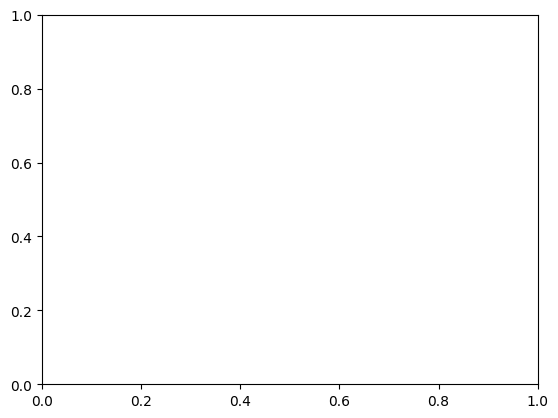

In [15]:
from pyvirtualdisplay import Display
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time
import os
import pyscreenshot as ImageGrab
import torch
import numpy as np

# --- Visualization Setup (from our debugging) ---
seed = 0
steps_to_show = 1000 # Your original value
game_width = 576
game_height = 330
bbox = (0, 0, game_width, game_height)

# Initialize variables to None before the try block for safe cleanup
vdisplay = None
env = None

original_dir = os.getcwd()
pufferlib_dir = '/opt/pufferlib'
# -------------------------------------------------
def first_obs(x):
    x = np.asarray(x)
    return x[0] if x.ndim > 1 else x

# This is your agent's decision-making function, it's perfect as is.
def policy_net(st):
    return q_net(st)


@torch.no_grad()
def greedy_action(state_np):
    st = torch.as_tensor(state_np, dtype=torch.float32, device=DEVICE).unsqueeze(0)
    q = policy_net(st)
    print(q)
    return int(q.argmax(dim=1).item())

# The robust 'try...finally' block for safe execution and cleanup
try:
    vdisplay = Display(visible=False, size=(game_width, game_height))
    vdisplay.start()

    # os.chdir(pufferlib_dir)
    # env = breakout.Breakout(num_envs=1, render_mode='human', seed=seed)
    # env = cartpole.Cartpole(num_envs=1, render_mode='human', seed=seed)
    env = cartpole.Cartpole(num_envs=1, render_mode='human', seed=seed)
    
    fig, ax = plt.subplots(1)

    current_directory = os.getcwd()
    print(f"Current directory: {current_directory}")
    
    # List all files and directories in the current directory
    contents = os.listdir(current_directory)
    print("Contents of the directory:")
    for item in contents:
        print(item)

    q_net = build_q_network(env, cfg).to(DEVICE)
    optimizer = torch.optim.Adam(q_net.parameters(), lr=cfg.lr)  # Placeholder optimizer for load_checkpoint
    checkpoint_path = 'checkpoint_cartpole_stage0.pth'  # Adjust path to your saved checkpoint
    if os.path.exists(checkpoint_path):
        print(f"File found at: {checkpoint_path}")
    
    load_checkpoint(checkpoint_path, q_net, optimizer)  # Load the trained model

    raise Error
    
    q_net.eval()  # Set to evaluation mode

    # --- Your Agent's Logic Starts Here ---
    obs, _ = env.reset(seed)
    state = first_obs(obs).astype(np.float32)
    episode_return = 0.0

    print("Starting agent visualization... Press 'Stop' to interrupt cleanly.")
    print("IMPORTANT: After interrupting, you MUST restart the kernel before running this cell again.")

    for t in range(steps_to_show):
        # The inner 'try...except' for clean interruption
        try:
            # Get action from your policy instead of random
            # q_net = build_q_network(env, cfg).to(DEVICE)
            a = greedy_action(state)

            # Step the environment
            obs, reward, term, trunc, _info = env.step(a)

            # --- Apply the Visualization Pipeline ---
            # 1. Render the game to the invisible virtual display
            env.render()

            # 2. Grab a cropped screenshot of the virtual display
            frame = ImageGrab.grab(bbox=bbox)

            # 3. Display the screenshot in the notebook
            clear_output(wait=True)
            ax.imshow(frame)
            ax.axis('off')
            display(fig)

            time.sleep(0.01)
            # --- End of Visualization Pipeline ---

            # Continue with your agent's logic
            state = first_obs(obs).astype(np.float32)
            episode_return += float(first_obs(reward))
            done = bool(first_obs(term)) or bool(first_obs(trunc))
            if done:
                print("Episode finished.")
                break

        except KeyboardInterrupt:
            print("\n\nInterrupted by user. The kernel is now in an unstable state and must be restarted.")
            break

    print(f'Greedy policy return: {episode_return:.2f}')

finally:
    # This block is ALWAYS executed, ensuring a safe shutdown.
    print("Cleaning up resources...")
    os.chdir(original_dir)

    if env is not None:
        env.close()

    time.sleep(0.5)

    if vdisplay is not None:
        vdisplay.stop()
    print("Cleanup complete. If you interrupted the cell, please restart the kernel now.")

In [11]:
def save_checkpoint(path, q_net, optimizer, cfg: Config, stage_name: str):
    torch.save({
        'model': q_net.state_dict(),
        'optimizer': optimizer.state_dict(),
        'config': dataclasses.asdict(cfg),
        'stage': stage_name,
    }, path)
    print('Saved checkpoint:', path)

def load_checkpoint(path, q_net, optimizer):
    data = torch.load(path, map_location=DEVICE)
    q_net.load_state_dict(data['model'])
    optimizer.load_state_dict(data['optimizer'])
    print('Loaded checkpoint from', path)
    print(data['config'])
 